Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (click the restart button in the tool bar or select Kernel$\rightarrow$Restart in the menu bar) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

**Make sure you delete `raise NotImplementedError()`** (if existing) and fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [74]:
NAME = "Stephen Shell"

**Don't modify the formal TEST cells!**

---

# matplotlib 2

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data, and, as always, make good plot choices. Everything that can be labeled should be labeled.

## Before homework

## scatter plots with colorbar (unstructured data)

Scatter plots are good for plotting x, y, z triplets when they are in triplet form (lists of x, y, z, coordinates) which may be randomly ordered, instead of ordered arrays. In fact, you may use 4 sets of data as well (e.g., x, y, z, t).

We can really capture 4 sets of information together in a `scatter` plot:

* x vs. y with markers (just like we can do with `plot`)
* x vs y with marker color representing z
* x vs. y with marker color and marker size representing two more sets of data

Learn more about scatter plots here <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

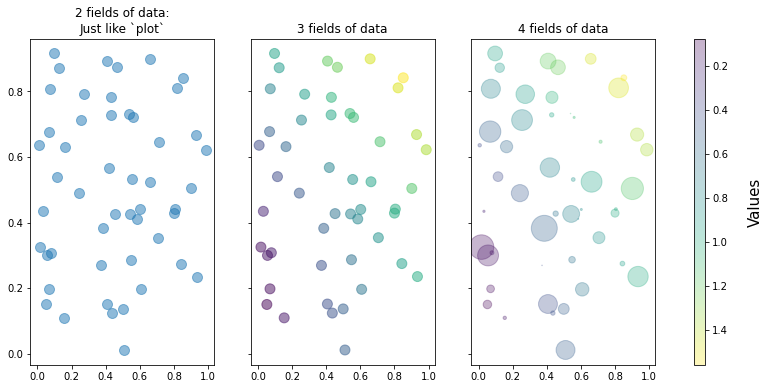

In [76]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = x+y**2
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(14,6))
axs[0].scatter(x, y, s=100, alpha=0.5)
axs[0].set_title('2 fields of data:\nJust like `plot`')

axs[1].scatter(x, y, s=100, c=colors, alpha=0.5)
axs[1].set_title('3 fields of data')

# the mappable is how the colorbar knows how to set up the range of data given the colormap
mappable = axs[2].scatter(x, y, s=area, c=colors, alpha=0.3)
axs[2].set_title('4 fields of data')

# add colorbar ax
cb = fig.colorbar(mappable, ax=axs, orientation = "vertical", aspect = 30)

# add the colorbar title
cb.set_label("Values", fontsize=15, labelpad=20)

# invert y axis
cb.ax.invert_yaxis()

### Now comes the homework

### 1. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD [(conductivity, temperature, and depth)](http://oceanexplorer.noaa.gov/facts/ctd.html) data the file `CTD.txt` (use `np.loadtxt` to load the data). Read in the data and use the `scatter` plotting function to make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using a marker to represent the data points.
1. plot temperature vs. salinity, and color the markers to vary with the depth of each point;
1. plot temperature vs. salinity, color the markers with the depth, and then scale the size of the markers with another property of your choice from the file. Feel free to multiply the data by a factor if needed to see the size difference in the markers.

Make sure the layout of the plot is clean and looks nice, and that the markers are reasonably visible so that the information in the plot is easily communicated.

---

Grading rubric [6 points]:

* [1 pt] plot temperature vs. salinity (temperature on y axis and salinity on x axis)
* [1 pt] plot temperature vs. salinity, and color the markers with the depth;
* [1 pt] plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.
* [3 pts] Overall aesthetics (colormap choice, clear labels, colorbars, marker size reasonable, font size, overall layout, etc)

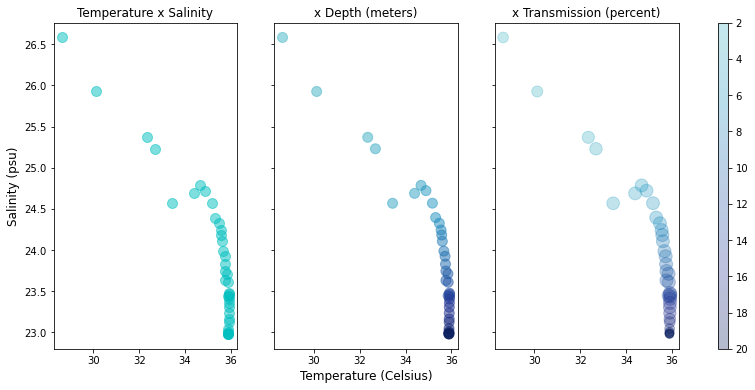

In [77]:
from matplotlib.colors import LinearSegmentedColormap

ctd = np.loadtxt('CTD.txt', comments = "*")

temp = ctd[:,5]
sal  = ctd[:,2]
dep  = ctd[:,1]
tran = ctd[:,9]
mod_tran = tran * 2

cmap = plt.get_cmap('YlGnBu')
colors = cmap(np.linspace(0.5, 1, cmap.N // 2))
ocean = LinearSegmentedColormap.from_list('Upper Half', colors)

fig, axs = plt.subplots(1, 3, sharey = True, figsize = (14,6))
axs[0].scatter(temp, sal, s = 100, color = 'c', alpha = 0.5)
axs[0].set_title('Temperature x Salinity')

axs[1].scatter(temp, sal, s = 100, c = dep, cmap = ocean, alpha = 0.5)
axs[1].set_title('x Depth (meters)')

# the mappable is how the colorbar knows how to set up the range of data given the colormap
mappable = axs[2].scatter(temp, sal, s = mod_tran, c = dep, cmap = ocean, alpha = 0.3)
axs[2].set_title('x Transmission (percent)')

# set labels
axs[1].set_xlabel("Temperature (Celsius)", fontsize = 12)
axs[0].set_ylabel("Salinity (psu)", fontsize = 12)

# add colorbar ax
cb = fig.colorbar(mappable, ax = axs, orientation = "vertical", aspect = 30)

# add the colorbar title
# cb.set_label("Depth (meters)", fontsize = 12, labelpad = 20)

# invert y axis
cb.ax.invert_yaxis()

# raise NotImplementedError()